#### いろいろ内容を飛ばしている、Numpy, Scipyの話はいずれやりますので少々お待ちください
Pythonでこういった勉強会ができるのも、これらのすばらしいライブラリがあるためです。  
が、これらライブラリの詳細な使い方なども説明していると...正直時間がなんぼあってもたりません。。。すみません。。。  
本勉強会の本質は、  
『あ、理論は直感的に感覚的に理解しておけばよくて、Python使えば簡単なコードで異常検知ができるんだー』  ですので、あしからず。  
  
では、今回の本題に入っていきます。

### 多変量正規分布に基づく異常検知
前回は、1変数のホテリング理論についての全貌をみていきました。  
この理論は２つ以上の変数についても拡張が可能となっています。  
  
ここでも1変数の場合の正規分布による異常検知理論でもそうであったように、正規分布を仮定します。  
データが『ひと山でだいたい安定している』ということです。  
これは、たんたんと生産を続ける工場の設備の異常を判定する、こというようなイメージになります。

1. ステップ1: 多次元正規分布の最尤推定  
    多変量正規分布の未知パラメータである$\mu$と$\Sigma$を$D$から最尤推定で定めましょう。  
    $N$個の観測データに独立性が仮定できるため、$D$に基づく未知のパラメータの対数尤度$L(\mu, \Sigma|D)$は次のようになります。  
    $$
    L(\mu, \Sigma|D) = In\prod_{n=1}^{N} N \left( x^{(n)}| \mu, \Sigma \right) = \sum_{n=1}^{N}InN \left( x^{(n)}| \mu, \Sigma \right)
    $$
    途中結果は省きます。結論からいうと、$\mu$の最尤推定の結果と合わせて、尤度が最大化される二つの未知のパラメータをデータ$D$から求めます。
  
2. ステップ2: 異常度の定義
    1変数のときと同様です。  
    負の対数尤度$-InN \left( x^{(n)}| \hat\mu, \hat\Sigma \right)$の２倍をもとに次のように定義します。  
    $$
    a(x^{'}) = (x^{'}-\hat\mu)^{T} \hat\Sigma^{-1}(x^{'}-\hat\mu)
    $$
    これは、観測データ$x^{'}$が、どれだけ標本平均$\hat\mu$から離れているかを表すものです。  
    「距離」という側面を強調して、**『マハラノビス距離』**(の２乗)と呼ぶこともあります。  
    大雑把にいうと、「ばらつきが大きい方向の変動はおおめに見てあげる」という効果があります。
    逆を返せば、「ばらつきが小さい方向の変動は厳しくみる」ということになります。
    例えば、２次元のデータであるならば上下左右の方向があります。
    横方向にばらつきが大きければ、変化はおおめに見つつ、縦方向にばらつきが少ないのであれば、変化を厳しくみる、といった具合です。
  
3. 閾値の設定(ホテリングのT^2理論)
    この辺りは、また複雑なお話になるので詳細は別途理論編でまとめます。  
    が、プログラム上は簡単に設定できます。

In [34]:
# 観測データを取得
df = pd.read_csv("./DATA/Davis.csv")
weight = df["weight"]
height = df["height"]

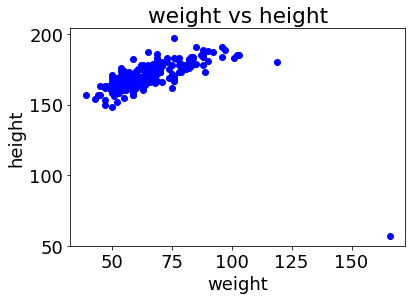

In [35]:
# 体重-身長をプロット
plt.plot(weight, height, "bo")
plt.title("weight vs height")
plt.xlabel("weight")
plt.ylabel("height")
plt.show()

In [36]:
X = pd.concat([weight, height], axis=1) # 標本数 * 次元数(2)のデータ行列
X = X.as_matrix() # numpyのarray型へ変換

/Users/Toki/tmp/Twitter_API/venv/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [37]:
mx = X.mean(axis=0) # 標本平均
Xc = X - mx # 中心化したデータ行列
# Sx = (1.0 / len(X)) * Xc.T.dot(Xc) # 標本共分散行列
Sx = np.cov(X, rowvar=0, bias=1) # 標本共分散行列
a = (Xc.dot(np.linalg.pinv(Sx)) * Xc).sum(axis=1)

In [38]:
# 閾値を設定
th = chi2.isf(1 - 0.99, 2)  # 自由度2のカイ２乗分布

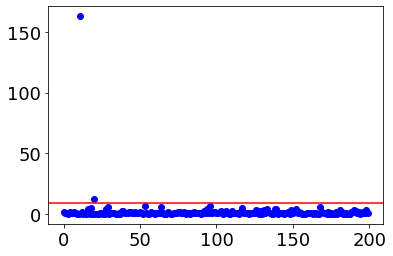

In [39]:
# 異常度をプロット
plt.plot(range(len(a)), a, "bo")
plt.axhline(y=th,color='red')
plt.show()

#### ちょっと丁寧に見ていくと...

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# 2次元の正規分布からデータセットを作成する
mean = np.array((0,0)) # 平均値をゼロに設定
cov = np.array([(100, 35), (100, 50)]) # 分散共分散行列を設定

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from statistics import mean, variance
from scipy import stats

In [4]:
# データセットの読み込み
num = []
data_weight = []
data_hight = []
data = []
with open('./DATA/Davis.csv', 'r', encoding="utf-8") as f:
    reader = csv.reader(f)
    header = next(reader)

    for row in reader:
        num.append(int(row[0])) # 標本番号を取得
        data_weight = int(row[2]) # 体重データを取得
        data_hight = int(row[3]) # 身長データを取得
        data.append([data_weight, data_hight])

In [5]:
len(data)

200

In [6]:
np.array(data)

array([[ 77, 182],
       [ 58, 161],
       [ 53, 161],
       [ 68, 177],
       [ 59, 157],
       [ 76, 170],
       [ 76, 167],
       [ 69, 186],
       [ 71, 178],
       [ 65, 171],
       [ 70, 175],
       [166,  57],
       [ 51, 161],
       [ 64, 168],
       [ 52, 163],
       [ 65, 166],
       [ 92, 187],
       [ 62, 168],
       [ 76, 197],
       [ 61, 175],
       [119, 180],
       [ 61, 170],
       [ 65, 175],
       [ 66, 173],
       [ 54, 171],
       [ 50, 166],
       [ 63, 169],
       [ 58, 166],
       [ 39, 157],
       [101, 183],
       [ 71, 166],
       [ 75, 178],
       [ 79, 173],
       [ 52, 164],
       [ 68, 169],
       [ 64, 176],
       [ 56, 166],
       [ 69, 174],
       [ 88, 178],
       [ 65, 187],
       [ 54, 164],
       [ 80, 178],
       [ 63, 163],
       [ 78, 183],
       [ 85, 179],
       [ 54, 160],
       [ 73, 180],
       [ 49, 161],
       [ 54, 174],
       [ 75, 162],
       [ 82, 182],
       [ 56, 165],
       [ 74,

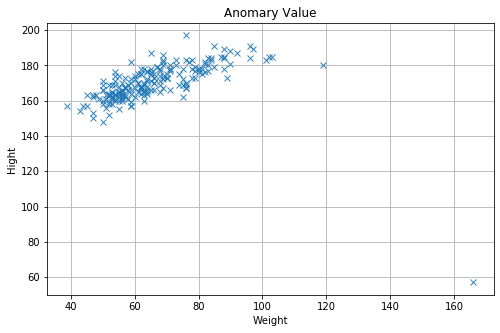

In [7]:
# データセットの分布を可視化
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
ax.grid()
ax.plot(np.array(data).T[0], np.array(data).T[1], 'x', alpha=0.9)
ax.set_title("Anomary Value")
ax.set_xlabel('Weight')
ax.set_ylabel('Hight')
plt.show()

In [8]:
# 標本の平均を計算
mu = np.array(data).mean(axis=0)
# 標本の分散共分散行列を計算
cov2 = np.cov(np.array(data).T)

In [9]:
print("母集団の平均")
print(mean)
print("標本平均")
print(mu)
print("母集団の分散共分散行列")
print(cov)
print("標本による分散共分散行列")
print(cov2)

母集団の平均
<function mean at 0x10dc221e0>
標本平均
[ 65.8  170.02]
母集団の分散共分散行列
[[100  35]
 [100  50]]
標本による分散共分散行列
[[227.85929648  34.3758794 ]
 [ 34.3758794  144.19055276]]


In [10]:
data[100]

[55, 164]

In [11]:
from scipy.spatial import distance
from scipy.stats import chi2

# 分散共分散行列の逆行列を計算
cov_i = np.linalg.pinv(cov2)

# 異常度を計算したい点を設定
x = data[100]

# 異常度を計算 (マハラノビス距離の2乗値を計算)
anomaly_score = distance.mahalanobis(x, mu, cov_i)**2

# 異常度を表示
print("異常度 = %.2f" % anomaly_score)

異常度 = 0.65


In [12]:
# データセット (変数X) に含まれる全データについて異常度を計算
anomaly_scores = np.array([distance.mahalanobis(x, mu, cov_i)**2 for x in np.array(data)])

In [13]:
anomaly_scores

array([1.31229390e+00, 7.09558736e-01, 1.08056095e+00, 3.39196520e-01,
       1.23785556e+00, 4.74078396e-01, 6.06109473e-01, 1.77268502e+00,
       4.91141867e-01, 1.15244573e-02, 2.13317773e-01, 1.62180931e+02,
       1.29269557e+00, 3.62118059e-02, 1.01120162e+00, 1.12190901e-01,
       4.23347031e+00, 7.84293981e-02, 5.11295017e+00, 3.35188992e-01,
       1.24484664e+01, 1.04682016e-01, 1.89975811e-01, 6.27741165e-02,
       6.65887973e-01, 1.11485117e+00, 3.69761889e-02, 3.25164080e-01,
       3.73183952e+00, 5.86091014e+00, 2.84730421e-01, 6.84073751e-01,
       7.71713191e-01, 9.47346542e-01, 3.43892377e-02, 2.95375429e-01,
       4.67956935e-01, 1.32927431e-01, 2.31718492e+00, 2.10658059e+00,
       7.40397703e-01, 1.13009704e+00, 3.47548633e-01, 1.54589674e+00,
       1.88407496e+00, 1.09951131e+00, 7.96549903e-01, 1.54124947e+00,
       8.49775656e-01, 1.00819653e+00, 1.80595254e+00, 5.11718524e-01,
       3.31743938e-01, 6.40291199e+00, 3.92517010e-01, 2.70558721e-01,
      

findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.


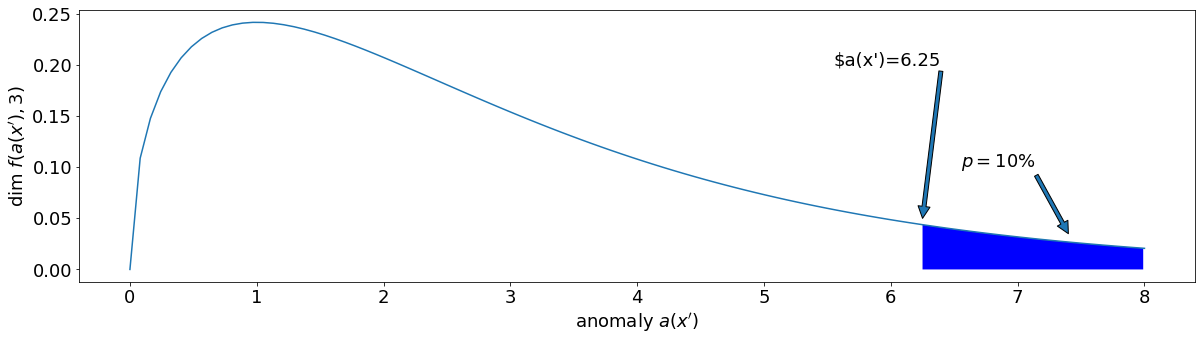

In [14]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.stats import chi2
import numpy as np

# 日本語フォント設定
font = {'family':'IPAexGothic'}
mpl.rc('font', **font)

# 自由度
m = 3

plt.rcParams["font.size"] = 18
plt.figure(figsize=(20,5))

# カイ二乗分布の確率密度関数を可視化
chi_pdf = np.array([(x, chi2.pdf(x, m)) for x in np.linspace(0, 8, 100)])
plt.plot(chi_pdf[:,0], chi_pdf[:,1])

x1 = np.arange(6.25, 8, 0.01)
y1 = chi2.pdf(x1, m)
y2 = np.zeros(x1.shape)
plt.fill_between(x1, y1, y2, where=y1>y2, facecolor='blue')
plt.annotate("$a(x')=6.25",
             xy=(6.25, 0.05), xytext=(5.55, 0.20), arrowprops=dict())
plt.annotate("$p=10\%$",
             xy=(7.4, 0.035), xytext=(6.55, 0.1), arrowprops=dict())
plt.xlabel("anomaly $a(x')$")
plt.ylabel("dim $f(a(x'), %d)$" % m)

plt.show()

In [15]:
m = 3    # 自由度 (特徴量の次元) を設定
p = 0.1  # 異常検知される確率を設定
threshold = chi2.isf(p, m)  # 異常検知の閾値を計算

print("自由度 %d で異常検知される確率を %1.2f %%に設定したければ，閾値は %1.2f" % (m, 100 * p, threshold))

自由度 3 で異常検知される確率を 10.00 %に設定したければ，閾値は 6.25


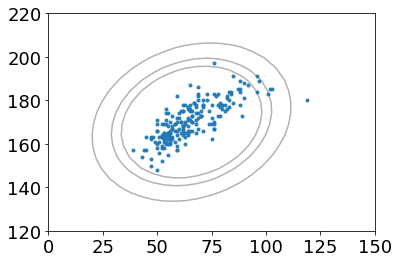

In [16]:
# 可視化したい「異常検知される確率」の値を設定
probs = [0.1, 0.05, 0.01]

# 確率に対応する等高線の値を計算
levels = [chi2.isf(x, np.array(data).shape[-1]) for x in probs]

# 表示範囲の指定
r = 250

# z軸値(異常度)を計算
z = np.array(
    [
        [(i, j, distance.mahalanobis([i,j], mu, cov_i)**2)
         for i in np.linspace(-r, r, 100)]
         for j in np.linspace(-r, r, 100)]
)

# グラフ描画
myfig = plt.figure()
myax = myfig.add_subplot(1, 1, 1)
myax.set_aspect('equal')
plt.ylim(120, 220)
plt.xlim(0, 150)

# 等高線図を描画
cont = plt.contour(z.transpose()[0], z.transpose()[1], z.transpose()[2], levels=levels, colors=['k'], alpha=0.3)

# 散布図の描画
plt.plot(np.array(data)[:,0], np.array(data)[:,1], '.', alpha=0.9)
plt.show()

In [17]:
print(f'異常と判定される閾値は {round(threshold,3)}...です')

異常と判定される閾値は 6.251...です


In [18]:
anomaly_data = np.array([print(f'{x}は異常なデータです...そのときの値は {round(distance.mahalanobis(x, mu, cov_i)**2, 3)}...です') 
                         for x in np.array(data) if distance.mahalanobis(x, mu, cov_i)**2 > threshold])

[166  57]は異常なデータです...そのときの値は 162.181...です
[119 180]は異常なデータです...そのときの値は 12.448...です
[102 185]は異常なデータです...そのときの値は 6.403...です
[103 185]は異常なデータです...そのときの値は 6.705...です


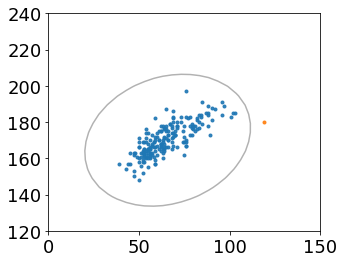

In [19]:
# 異常検知の実施
##  異常検知される確率を1%に設定
p = 0.01

## 確率に対応する異常度の閾値を計算
threshold = chi2.isf(p, np.array(data).shape[-1])

## データセットについて異常検知を実施
anomaly_data = np.array([x for x in np.array(data) if distance.mahalanobis(x, mu, cov_i)**2 > threshold])

## 可視化用に正常データのみを含むリストも作る
normal_data = np.array([x for x in np.array(data) if distance.mahalanobis(x, mu, cov_i)**2 <= threshold])

# 散布図として異常検知結果を可視化する
## 表示範囲の指定
r = 250

## z軸値(異常度)を計算
z = np.array(
    [
        [(i, j, distance.mahalanobis([i,j], mu, cov_i)**2)
         for i in np.linspace(-r, r, 100)]
         for j in np.linspace(-r, r, 100)]
)

## グラフ描画
myfig = plt.figure()
myax = myfig.add_subplot(1, 1, 1)
myax.set_aspect('equal')
plt.ylim(120, 240)
plt.xlim(0, 150)

## 等高線図を描画
cont = plt.contour(z.transpose()[0], z.transpose()[1], z.transpose()[2], levels=[threshold], colors=['k'], alpha=0.3)

## 散布図の描画
plt.plot(normal_data[:,0], normal_data[:,1], '.', alpha=0.9)
plt.plot(anomaly_data[:,0], anomaly_data[:,1], '.', alpha=0.9)
plt.show()

### マハラノビス・タグチ法
多変数のホテリング理論で計算されるのは、全体の系の総合的な異常度であって個別の異常ではありません。  
マハラノビス・タグチ法は、ホテリング統計量(またはマハラノビス距離)に基づく外れ値検出手法に、異常変数の選択手法を組み合わせることで、  
この問題を解決しています。  
マハラノビス・タグチ法は、MT法やMTシステムとも呼ばれます。  
MT法には様々な種類の派生型がありますが、TaguchiおよびJugulumで述べられている内容を要約すると次のようになります。  
  
正常データが圧倒的多数だと信じられているデータセット$D={x^{1}, ... , x^{N}}$と、  
異常と判明しているデータセット$D^{'}={x^{'(1)}, ... , x^{'N^{'}}}$を用意する。変数の数は共に$M$(したがってデータセットは$M$次元)とする。
  
1) 分布推定: $D$をもとに、標本平均と標本分散を求める。  
2) 異常度の計算: $D$の中の各標本に対して、1変数あたりのマハラノビス距離($M$次元であるから$M$で割る)を計算する。  
3) 異常判定1: $D$の標本が正常範囲に入るように1変数あたりのマハラノビス距離の閾値を決める。  
4) 異常判定2: $D^{'}$の各標本に対して、M変数の中からいくつかの変数を選び、その変数集合の１変数あたりの異常度を計算する。  
  

最後のステップで、個々の変数の寄与が数値化されて、「何が悪さをしていたのか」という質問に一応答えることが可能となります。

**[Rdatasets](https://vincentarelbundock.github.io/Rdatasets/datasets.html)**  
これのうちの、今回は"road.csv"を利用します。  
このデータは、26州について、交通事故死亡者数"deaths", 運転者数"drivers", 人口密度"popden", 郊外地区の道路長"rural",   
1月における1日の最高気温の平均値"temp", 1年ごとの燃料消費量"fuel"という６つの変数を記録したデータとなります。

In [40]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import chi2

In [41]:
# 観測データを取得
df = pd.read_csv("./DATA/road.csv", index_col=0)   # インデックス列は除いて読み込む
df

,deaths,drivers,popden,rural,temp,fuel
Alabama,968,158,64.0,66.0,62,119.0
Alaska,43,11,0.4,5.9,30,6.2
Arizona,588,91,12.0,33.0,64,65.0
Arkanas,640,92,34.0,73.0,51,74.0
Calif,4743,952,100.0,118.0,65,105.0
Colo,566,109,17.0,73.0,42,78.0
Conn,325,167,518.0,5.1,37,95.0
Dela,118,30,226.0,3.4,41,20.0
DC,115,35,12524.0,0.0,44,23.0
Florida,1545,298,91.0,57.0,67,216.0


In [42]:
# Numpyのarray型へ変換
X = df.drop("drivers", axis=1).as_matrix()  # drivers列を除く
drivers = df.as_matrix(columns=["drivers"])

/Users/Toki/tmp/Twitter_API/venv/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/Users/Toki/tmp/Twitter_API/venv/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [43]:
# マハラノビス=タグチ法
X = X / drivers     # 1ドライバー当たりの数値に変換
X = np.log(X + 1)   # 対数変換（ボックス=コックス変換）
mx = X.mean(axis=0) # 標本平均
Xc = X - mx         # 中心化したデータ行列
# Sx = (1.0 / len(X)) * Xc.T.dot(Xc) # 標本共分散行列
Sx = np.cov(X, rowvar=0, bias=1) # 標本共分散行列
a = (Xc.dot(np.linalg.pinv(Sx)) * Xc).sum(axis=1) / X.shape[1]  # 1変数当たりの異常度

1変数ごとのマハラノビス距離を計算していきます。
閾値の線は"1"としています。

In [44]:
# 閾値を決定
# （標本が正常範囲に入るように1変数当たりのマハラノビス距離の閾値を決める）
th = 1.0

state_label = df.index[a>th]    # 閾値を超えた州の名前リスト
state_a = a[a>th]               # 閾値を超えた州の異常度リスト
print(state_label)
print(state_a)

Index(['Alaska', 'Calif', 'Dela', 'DC', 'Maine', 'Mont'], dtype='object')
[3.5819906  4.5590257  1.00239092 4.34566837 3.57297596 2.28755737]


'Alaska', 'Calif', 'DC', 'Maine', 'Mont' の５つの州が顕著に高い異常度となっています。  
可視化すると、次のようになります。

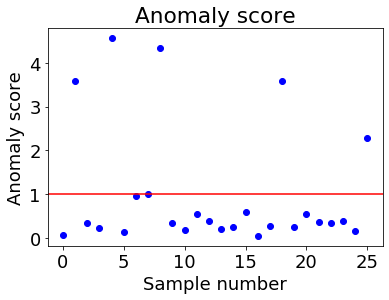

In [45]:
# プロット
plt.plot(range(len(a)), a, "bo")
plt.axhline(y=th,color='red')
plt.title("Anomaly score")
plt.xlabel("Sample number")
plt.ylabel("Anomaly score")
plt.show()

上記で、「何が悪さをしていたのか」という質問に一応答えることが可能、  
と言いましたが、タグチらは次の指標を経験的に導入しています。  
$$
SN_{q} \equiv -10log_{10}\left \{ \frac{1}{N^{'}} \sum_{n=1}^{N^{'}} \frac{1}{a_{q}(x^{'(n)})/M_{q}} \right \}
$$
これを変数集合$q$に対するSN比(有用性の指標)としています。  
ただし、$q$は変数の取捨選択パターンを区別する添字で、$M_{q}$はパターン$q$における変数の数、$a_{q}$はパターン$q$に対応して  
$M_{q} \times M_{q}$次元の共分散行列を使ったときの異常度です。  

SN比解析を行うために、$N^{'}=1, M_{q}=1$として各変数のSN比を計算してみます。  
この場合のSN比の式は非常に簡単です。  
$$
SN_{q} = 10log_{10} \frac{a_{q}(x^{'(n)})}{M_{q}} = 10log_{10} \frac{(x_{q}^{'}-\hat \mu_{q})^{2}}{\hat \sigma_{q}^{2}}
$$

Califのデータを参考にして、見ていきます

In [48]:
# SN比解析(上の式のように定義)
xc_prime = Xc[4,:]  # 中心化行列からCalifのデータ行を取得
SN1 = 10 * np.log10(xc_prime**2 / np.diag(Sx))

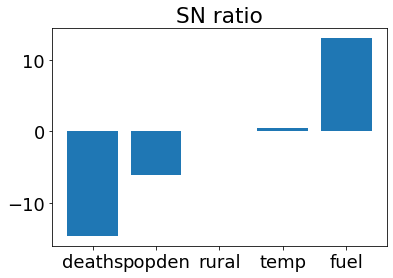

In [49]:
plt.bar(range(len(SN1)), SN1, tick_label=["deaths","popden","rural","temp","fuel"], align="center")
plt.title("SN ratio")
plt.show()

これからわかることは、負のSN比は、平均からの偏差が標準偏差よりも小さい場合場合に生じます。  
ということは、"Calif"の大きな異常値は、ほとんどすべて'、fuel'が「悪さ」をしていることがわかります。

他の、４つの州は下記のようになります。

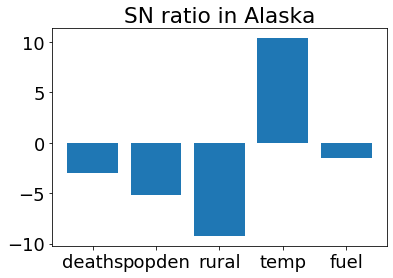

In [52]:
### 'Alaska'
xc_prime = Xc[1,:]
SN1 = 10 * np.log10(xc_prime**2 / np.diag(Sx))
plt.bar(range(len(SN1)), SN1, tick_label=["deaths","popden","rural","temp","fuel"], align="center")
plt.title("SN ratio in Alaska")
plt.show()

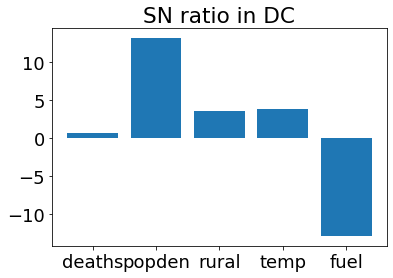

In [53]:
### 'DC'
xc_prime = Xc[8,:]
SN1 = 10 * np.log10(xc_prime**2 / np.diag(Sx))
plt.bar(range(len(SN1)), SN1, tick_label=["deaths","popden","rural","temp","fuel"], align="center")
plt.title("SN ratio in DC")
plt.show()

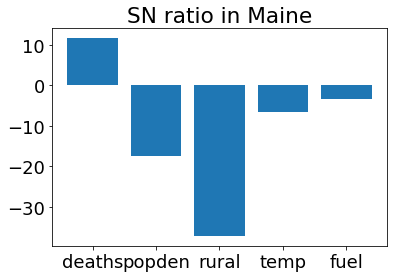

In [54]:
### 'Maine'
xc_prime = Xc[-8,:]
SN1 = 10 * np.log10(xc_prime**2 / np.diag(Sx))
plt.bar(range(len(SN1)), SN1, tick_label=["deaths","popden","rural","temp","fuel"], align="center")
plt.title("SN ratio in Maine")
plt.show()

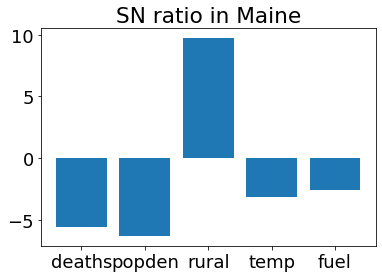

In [55]:
### 'Mont'
xc_prime = Xc[-1,:]
SN1 = 10 * np.log10(xc_prime**2 / np.diag(Sx))
plt.bar(range(len(SN1)), SN1, tick_label=["deaths","popden","rural","temp","fuel"], align="center")
plt.title("SN ratio in Maine")
plt.show()

### 非対称なデータに対する異常検知
これまでは、正常データの様子が正規分布、すなわち単一の左右対称の山で表されると仮定して異常検知の方法を考えてきました。  
データが普通の正規分布では捉えきれない場合の処方箋を見ていきます。  
まずはガンマ分布をみていきます。  
  
第1回で扱ったDavisデータをもう一度確認してみます。  

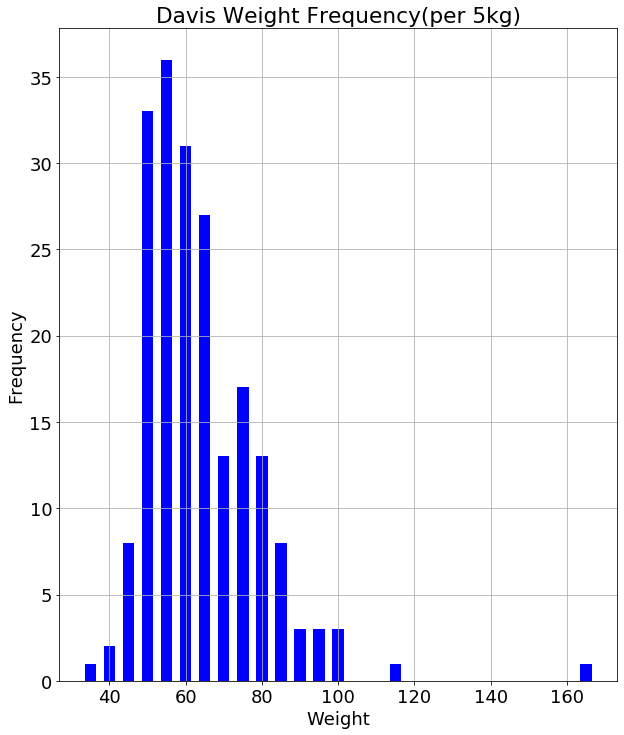

In [57]:
import collections
df = pd.read_csv("./DATA/Davis.csv", header=0, index_col=0)
# データセットの読み込み
num = []
data = []
with open('./DATA/Davis.csv', 'r', encoding="utf-8") as f:
    reader = csv.reader(f)
    header = next(reader)

    for row in reader:
        num.append(int(row[0]))  #標本番号を取得
        data.append(int(row[2])) #体重データを取得

data_freq = data
label = [int((i+1)*5) for i in range(36)]

data_new = []
for i in range(len(label)):
    for j in data_freq:
        if j >= label[i] and j<label[i+1]:
            data_new.append(label[i])

c = collections.Counter(data_new)

weight_class = []
class_count = []
for i, j in c.most_common():
    weight_class.append(i)
    class_count.append(j)

fig = plt.figure(figsize=(10,12))
ax = fig.add_subplot(111)
ax.grid()
ax.bar(weight_class, class_count, width=3, color='blue', )
ax.set_title("Davis Weight Frequency(per 5kg)")
ax.set_xlabel('Weight')
ax.set_ylabel('Frequency')
plt.show()

体重が大きい方向に、長い尾をもつ左側に偏りのある分布となっています。  
これを無理やり左右対称の正規分布に当てはめるのは、少々無理があるように思えます。  
  
また正規分布は厳密にいうと、$-\infty$から$\infty$で定義された確率分布ですが、一般的に、体重はマイナスにはなりません。  
この意味でも、やはり正規分布をこのDavisデータに当て込むのは無理があります。  
このような状況、つまり「ひと山」ではあるけれど、  
正の値しか取らない、分布が左右対称ではない、  
という特徴をもつデータに対してはカイ二乗分布、または**ガンマ分布**の当てはめが有効です。

### ガンマ分布を表現するための、各種ライブラリの比較

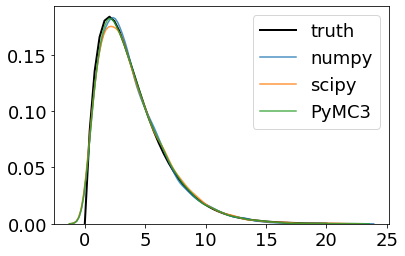

In [58]:
import numpy as np
import scipy as sp
import pymc3 as pm
import matplotlib.pyplot as plt
import seaborn as sns

shape = 2
scale = 2
rate = 1 / scale
n_sample = 10000

xx = np.linspace(0, 20)
# ground truth
gamma_pdf = sp.stats.gamma(a=shape, scale=scale).pdf

s_np = np.random.gamma(shape=shape, scale=scale, size=n_sample)
s_sp = sp.stats.gamma(a=shape, scale=scale).rvs(size=n_sample)
s_pm = pm.Gamma.dist(alpha=shape, beta=rate).random(size=n_sample)

fig, ax = plt.subplots()
ax.plot(xx, gamma_pdf(xx), label='truth', lw=2, c='k')
sns.kdeplot(s_np, ax=ax, label='numpy', alpha=0.8)
sns.kdeplot(s_sp, ax=ax, label='scipy', alpha=0.8)
sns.kdeplot(s_pm, ax=ax, label='PyMC3', alpha=0.8)

Numpyを利用して、ガンマ分布の表現をいくつか見ると次のようになる

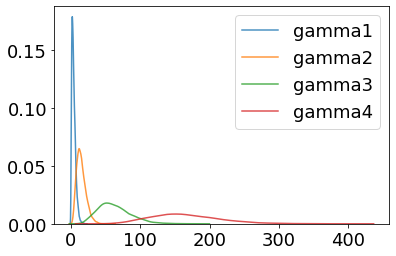

In [59]:
shape1 = 2
shape2 = 5
shape3 = 7
shape4 = 11
scale1 = 2
scale2 = 3
scale3 = 9
scale4 = 15
n_sample1 = 10000

s_np1 = np.random.gamma(shape=shape1, scale=scale1, size=n_sample1)
s_np2 = np.random.gamma(shape=shape2, scale=scale2, size=n_sample1)
s_np3 = np.random.gamma(shape=shape3, scale=scale3, size=n_sample1)
s_np4 = np.random.gamma(shape=shape4, scale=scale4, size=n_sample1)
fig, ax = plt.subplots()
sns.kdeplot(s_np1, ax=ax, label='gamma1', alpha=0.8)
sns.kdeplot(s_np2, ax=ax, label='gamma2', alpha=0.8)
sns.kdeplot(s_np3, ax=ax, label='gamma3', alpha=0.8)
sns.kdeplot(s_np4, ax=ax, label='gamma4', alpha=0.8)

**ガンマ分布による異常検知**
1. ステップ1 (分布推定): モーメント法あるいは数値最適化による最尤法によって、ガンマ分布のパラメータを推定する
2. ステップ2 (異常度の定義): 新たな観測値$x^{'}$を得るたびに、異常度$a(x^{'})$を計算する。
3. ステップ3 (閾値の決定): 訓練データを使ってあらかじめ$\alpha$パーセントタイルに対応する異常度の値$a_{th}(\alpha)$を求めておき、$a(x^{'}) > a_{th}(\alpha)$ならアラート
  
理論は別で詳細をみていきます。

In [60]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# データ読み込み
df = pd.read_csv("./DATA/Davis.csv")
weight = df["weight"].as_matrix()

/Users/Toki/tmp/Twitter_API/venv/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


In [61]:
# ガンマ分布における異常度を計算
N = len(weight)     # 標本数
mu = weight.mean()  # 標本平均
si = np.std(weight) # 標準偏差　
kmo = (mu / si) ** 2    # モーメント法によるkの推定値
smo = (si ** 2) / mu    # モーメント法によるsの推定値

In [62]:
a = weight / smo - (kmo - 1) * np.log(weight / smo)    # 異常度

In [63]:
sorted_a = np.sort(a)[::-1] # 降順にソート　
th = sorted_a[(int(N * 0.01 - 1))]  # 異常度の上位1%分位点に置ける異常度

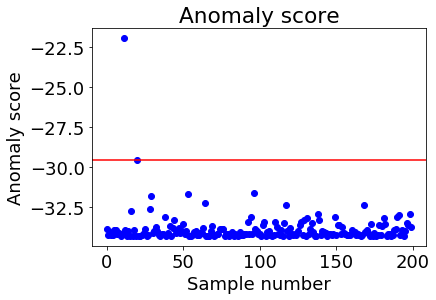

In [64]:
# プロット
plt.plot(range(len(a)), a, "bo")
plt.axhline(y=th,color='red')
plt.title("Anomaly score")
plt.xlabel("Sample number")
plt.ylabel("Anomaly score")
plt.show()

今回のDavisデータでは大きく差があるとは言えませんが、
とはいえ、異常と判定されるデータ点は異なります。  
「分布をより正確に捉えることが、異常検知の精度を向上させる」という仮定のもとで言えば、ガンマ分布による異常検知は良い、となります。  

今回は以上となります。